In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
df = pd.read_csv(r'C:\Users\abhis\OneDrive\Desktop\mousami Datascience class\Excel files\crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [35]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [23]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
Encode = LabelEncoder()

In [30]:
Encoded_location = Encode.fit_transform(df.iloc[:,0])
print(Encoded_location)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [32]:
df['Unnamed: 0'] = Encoded_location
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0,13.2,236,58,21.2
1,1,10.0,263,48,44.5
2,2,8.1,294,80,31.0
3,3,8.8,190,50,19.5
4,4,9.0,276,91,40.6


In [29]:
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return(x)

In [33]:
# df1 = norm_func(df)
# df1.describe()

In [39]:
X = df[['Murder', 'Assault', 'UrbanPop', 'Rape']].values
X.shape

(50, 4)

In [40]:
from sklearn.cluster import KMeans

In [41]:
z = []

In [42]:
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init=10, max_iter=300,random_state=None)
    kmeans.fit(X)
    z.append(kmeans.inertia_)    

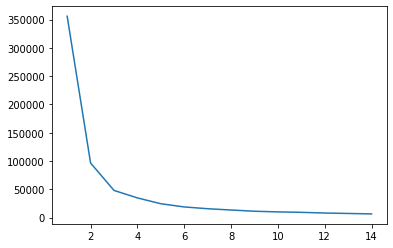

In [43]:
plt.plot(range(1,15),z)

In [44]:
# from the above elbow plot we see a downward gradient from 2 to 3. Choosing the number of cluster to be 3. 

In [47]:
kmeans = KMeans(n_clusters=3,init='k-means++',n_init=10, max_iter=300,random_state=None)
a = kmeans.fit_predict(X)

Text(0.5, 1.0, 'Crime_rate')

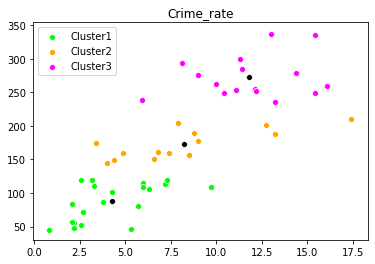

In [50]:
sns.scatterplot(x=X[a==0,0],y=X[a==0,1],color='lime',label='Cluster1')
sns.scatterplot(x=X[a==1,0],y=X[a==1,1],color='orange',label='Cluster2')
sns.scatterplot(x=X[a==2,0],y=X[a==2,1],color='magenta',label='Cluster3')
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Crime_rate')